In [1]:
import pandas as pd

df = pd.read_csv('../input/train_ship_segmentations_v2.csv')
df.head()

,ImageId,EncodedPixels
0,00003e153.jpg,NaN
1,0001124c7.jpg,NaN
2,000155de5.jpg,264661 17 265429 33 266197 33 266965 33 267733...
3,000194a2d.jpg,360486 1 361252 4 362019 5 362785 8 363552 10 ...
4,000194a2d.jpg,51834 9 52602 9 53370 9 54138 9 54906 9 55674 ...


In [2]:
ser_counts = df.groupby('ImageId').size()
ser_counts.head(10)

ImageId
00003e153.jpg    1
0001124c7.jpg    1
000155de5.jpg    1
000194a2d.jpg    5
0001b1832.jpg    1
00021ddc3.jpg    9
0002756f7.jpg    2
0002d0f32.jpg    1
000303d4d.jpg    1
00031f145.jpg    1
dtype: int64

In [3]:
print(f'Number of unique images: {ser_counts.size}')

Number of unique images: 192556


In [4]:
df_counts = ser_counts.reset_index(name='ship_count')
df_counts.head()

,ImageId,ship_count
0,00003e153.jpg,1
1,0001124c7.jpg,1
2,000155de5.jpg,1
3,000194a2d.jpg,5
4,0001b1832.jpg,1


In [5]:
df_counts.loc[df_counts.ship_count == 1].shape

(177104, 2)

Out of the 177,104 entries, 150,000 have no ships in them. We set the `ship_count` of these entries to 0.

In [6]:
images_wo_ships = df[df.EncodedPixels.isnull()].ImageId.values
print(images_wo_ships)

['00003e153.jpg' '0001124c7.jpg' '0001b1832.jpg' ... 'ffff6e525.jpg'
 'ffffc50b4.jpg' 'ffffe97f3.jpg']


In [7]:
df_counts.loc[df_counts.ImageId.isin(images_wo_ships), 'ship_count'] = 0

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f3155214d68>]],
      dtype=object)

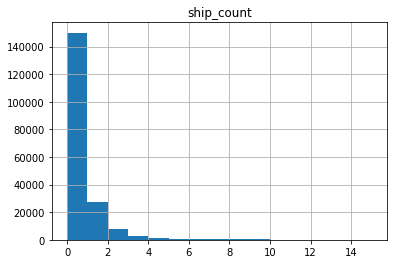

In [8]:
df_counts.hist(column='ship_count', bins=15)

In [9]:
def compute_count_distribution(dataframe):
    new_df = dataframe.groupby('ship_count').size().reset_index(name='number_of_samples')
    total_samples = new_df.number_of_samples.sum()
    new_df['percentage'] = new_df.apply(lambda x: 100*x.number_of_samples/total_samples, axis='columns')
    print(new_df)
    print(f'Total number of samples: {total_samples}')
    return new_df

compute_count_distribution(df_counts)

    ship_count  number_of_samples  percentage
0            0             150000   77.899416
1            1              27104   14.075905
2            2               7674    3.985334
3            3               2954    1.534099
4            4               1622    0.842352
5            5                925    0.480380
6            6                657    0.341199
7            7                406    0.210848
8            8                318    0.165147
9            9                243    0.126197
10          10                168    0.087247
11          11                144    0.074783
12          12                124    0.064397
13          13                 75    0.038950
14          14                 76    0.039469
15          15                 66    0.034276
Total number of samples: 192556


,ship_count,number_of_samples,percentage
0,0,150000,77.899416
1,1,27104,14.075905
2,2,7674,3.985334
3,3,2954,1.534099
4,4,1622,0.842352
5,5,925,0.480380
6,6,657,0.341199
7,7,406,0.210848
8,8,318,0.165147
9,9,243,0.126197


In [10]:
from sklearn.model_selection import train_test_split

train_ids, test_ids = train_test_split(df_counts)

print('Training data distribution')
train_stats = compute_count_distribution(train_ids)

print('Test data distribution')
test_stats = compute_count_distribution(test_ids)

Training data distribution
    ship_count  number_of_samples  percentage
0            0             112458   77.870334
1            1              20312   14.064826
2            2               5779    4.001606
3            3               2210    1.530291
4            4               1197    0.828850
5            5                716    0.495787
6            6                503    0.348297
7            7                294    0.203577
8            8                247    0.171032
9            9                195    0.135026
10          10                136    0.094172
11          11                103    0.071321
12          12                 94    0.065089
13          13                 64    0.044316
14          14                 60    0.041546
15          15                 49    0.033930
Total number of samples: 144417
Test data distribution
    ship_count  number_of_samples  percentage
0            0              37542   77.986664
1            1               6792   14.10914

In [11]:
df_merged = pd.merge(train_stats, test_stats, suffixes=('_train', '_test'), on='ship_count')
df_merged['train_test_ratio'] = df_merged.apply(lambda x: x.number_of_samples_train / (x.number_of_samples_train + x.number_of_samples_test), axis='columns')
df_merged

,ship_count,number_of_samples_train,percentage_train,number_of_samples_test,percentage_test,train_test_ratio
0,0,112458,77.870334,37542,77.986664,0.749720
1,1,20312,14.064826,6792,14.109142,0.749410
2,2,5779,4.001606,1895,3.936517,0.753062
3,3,2210,1.530291,744,1.545524,0.748138
4,4,1197,0.828850,425,0.882860,0.737978
5,5,716,0.495787,209,0.434159,0.774054
6,6,503,0.348297,154,0.319907,0.765601
7,7,294,0.203577,112,0.232660,0.724138
8,8,247,0.171032,71,0.147490,0.776730
9,9,195,0.135026,48,0.099711,0.802469


In [17]:
print(f'Mean: {df_merged["train_test_ratio"].mean()}')
print(f'Standard deviation: {df_merged["train_test_ratio"].std()}')

Mean: 0.7655873221345757
Standard deviation: 0.034962634184281034


Now, we do the train/test split with stratify to see if it affects the train/test ratio.

In [12]:
train_ids_strat, test_ids_strat = train_test_split(df_counts, stratify=df_counts.ship_count)

print('Training data distribution')
train_stats_strat = compute_count_distribution(train_ids_strat)

print('Test data distribution')
test_stats_strat = compute_count_distribution(test_ids_strat)

Training data distribution
    ship_count  number_of_samples  percentage
0            0             112500   77.899416
1            1              20328   14.075905
2            2               5755    3.984988
3            3               2216    1.534445
4            4               1217    0.842699
5            5                694    0.480553
6            6                493    0.341373
7            7                304    0.210502
8            8                239    0.165493
9            9                182    0.126024
10          10                126    0.087247
11          11                108    0.074783
12          12                 93    0.064397
13          13                 56    0.038777
14          14                 57    0.039469
15          15                 49    0.033930
Total number of samples: 144417
Test data distribution
    ship_count  number_of_samples  percentage
0            0              37500   77.899416
1            1               6776   14.07590

In [13]:
df_merged_strat = pd.merge(train_stats_strat, test_stats_strat, suffixes=('_train', '_test'), on='ship_count')
df_merged_strat['train_test_ratio'] = df_merged_strat.apply(lambda x: x.number_of_samples_train / (x.number_of_samples_train + x.number_of_samples_test), axis='columns')
df_merged_strat

,ship_count,number_of_samples_train,percentage_train,number_of_samples_test,percentage_test,train_test_ratio
0,0,112500,77.899416,37500,77.899416,0.750000
1,1,20328,14.075905,6776,14.075905,0.750000
2,2,5755,3.984988,1919,3.986373,0.749935
3,3,2216,1.534445,738,1.533061,0.750169
4,4,1217,0.842699,405,0.841314,0.750308
5,5,694,0.480553,231,0.479860,0.750270
6,6,493,0.341373,164,0.340680,0.750381
7,7,304,0.210502,102,0.211886,0.748768
8,8,239,0.165493,79,0.164108,0.751572
9,9,182,0.126024,61,0.126716,0.748971


In [18]:
print(f'Mean: {df_merged_strat["train_test_ratio"].mean()}')
print(f'Standard deviation: {df_merged_strat["train_test_ratio"].std()}')

Mean: 0.7493416286615788
Standard deviation: 0.0021128344729438525
